In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from keras.utils import np_utils
import matplotlib.pyplot as plt
import keras

In [87]:
import warnings
warnings.filterwarnings("ignore")

In [88]:
filename = './pima_diabetes.csv' 

In [90]:
col_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
df = pd.read_csv(filename, names=col_names) 

In [91]:
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


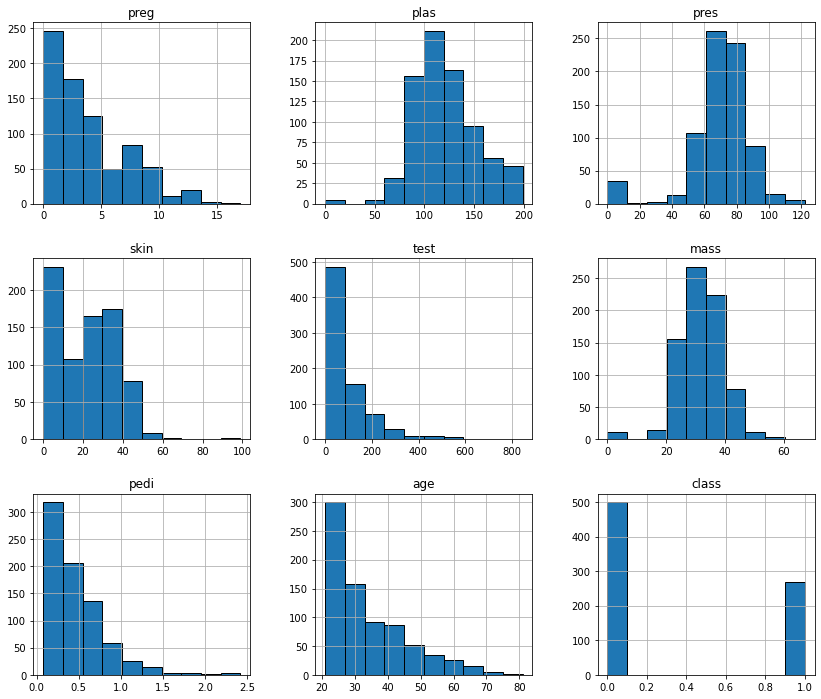

In [92]:
# Plotting histogram for each variable. 

df.hist(edgecolor= 'black',figsize=(14,12))
plt.show()

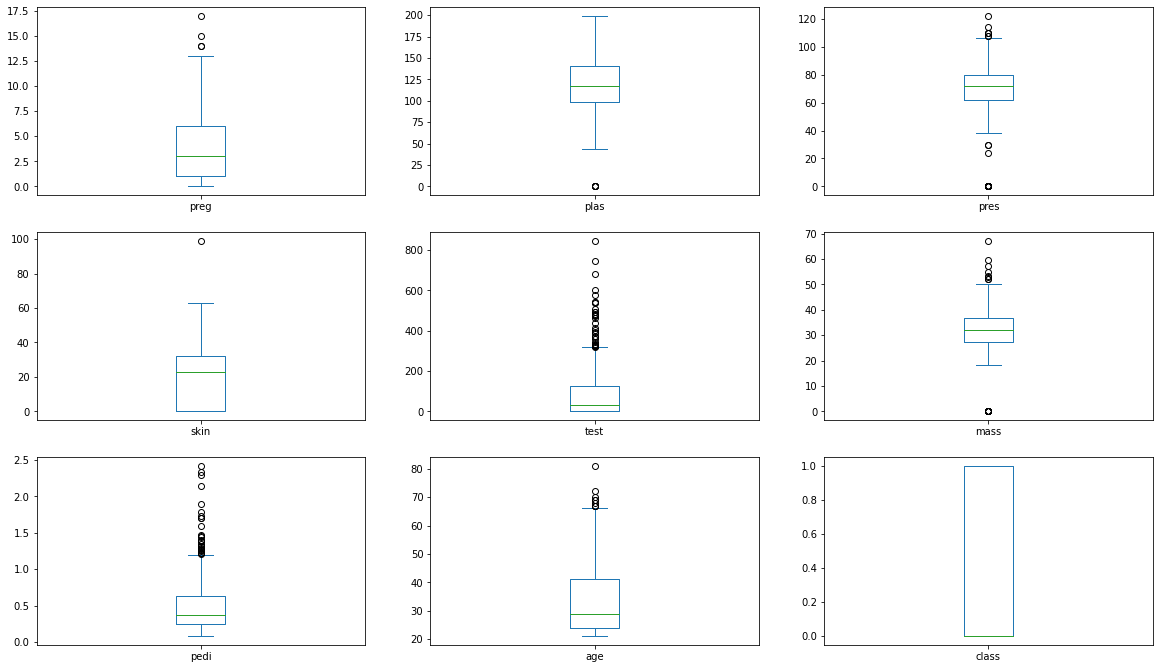

In [93]:
# Creating Boxplots
df.plot(kind="box", subplots=True, layout=(5,3), sharex=False, figsize=(20,20))
plt.show()

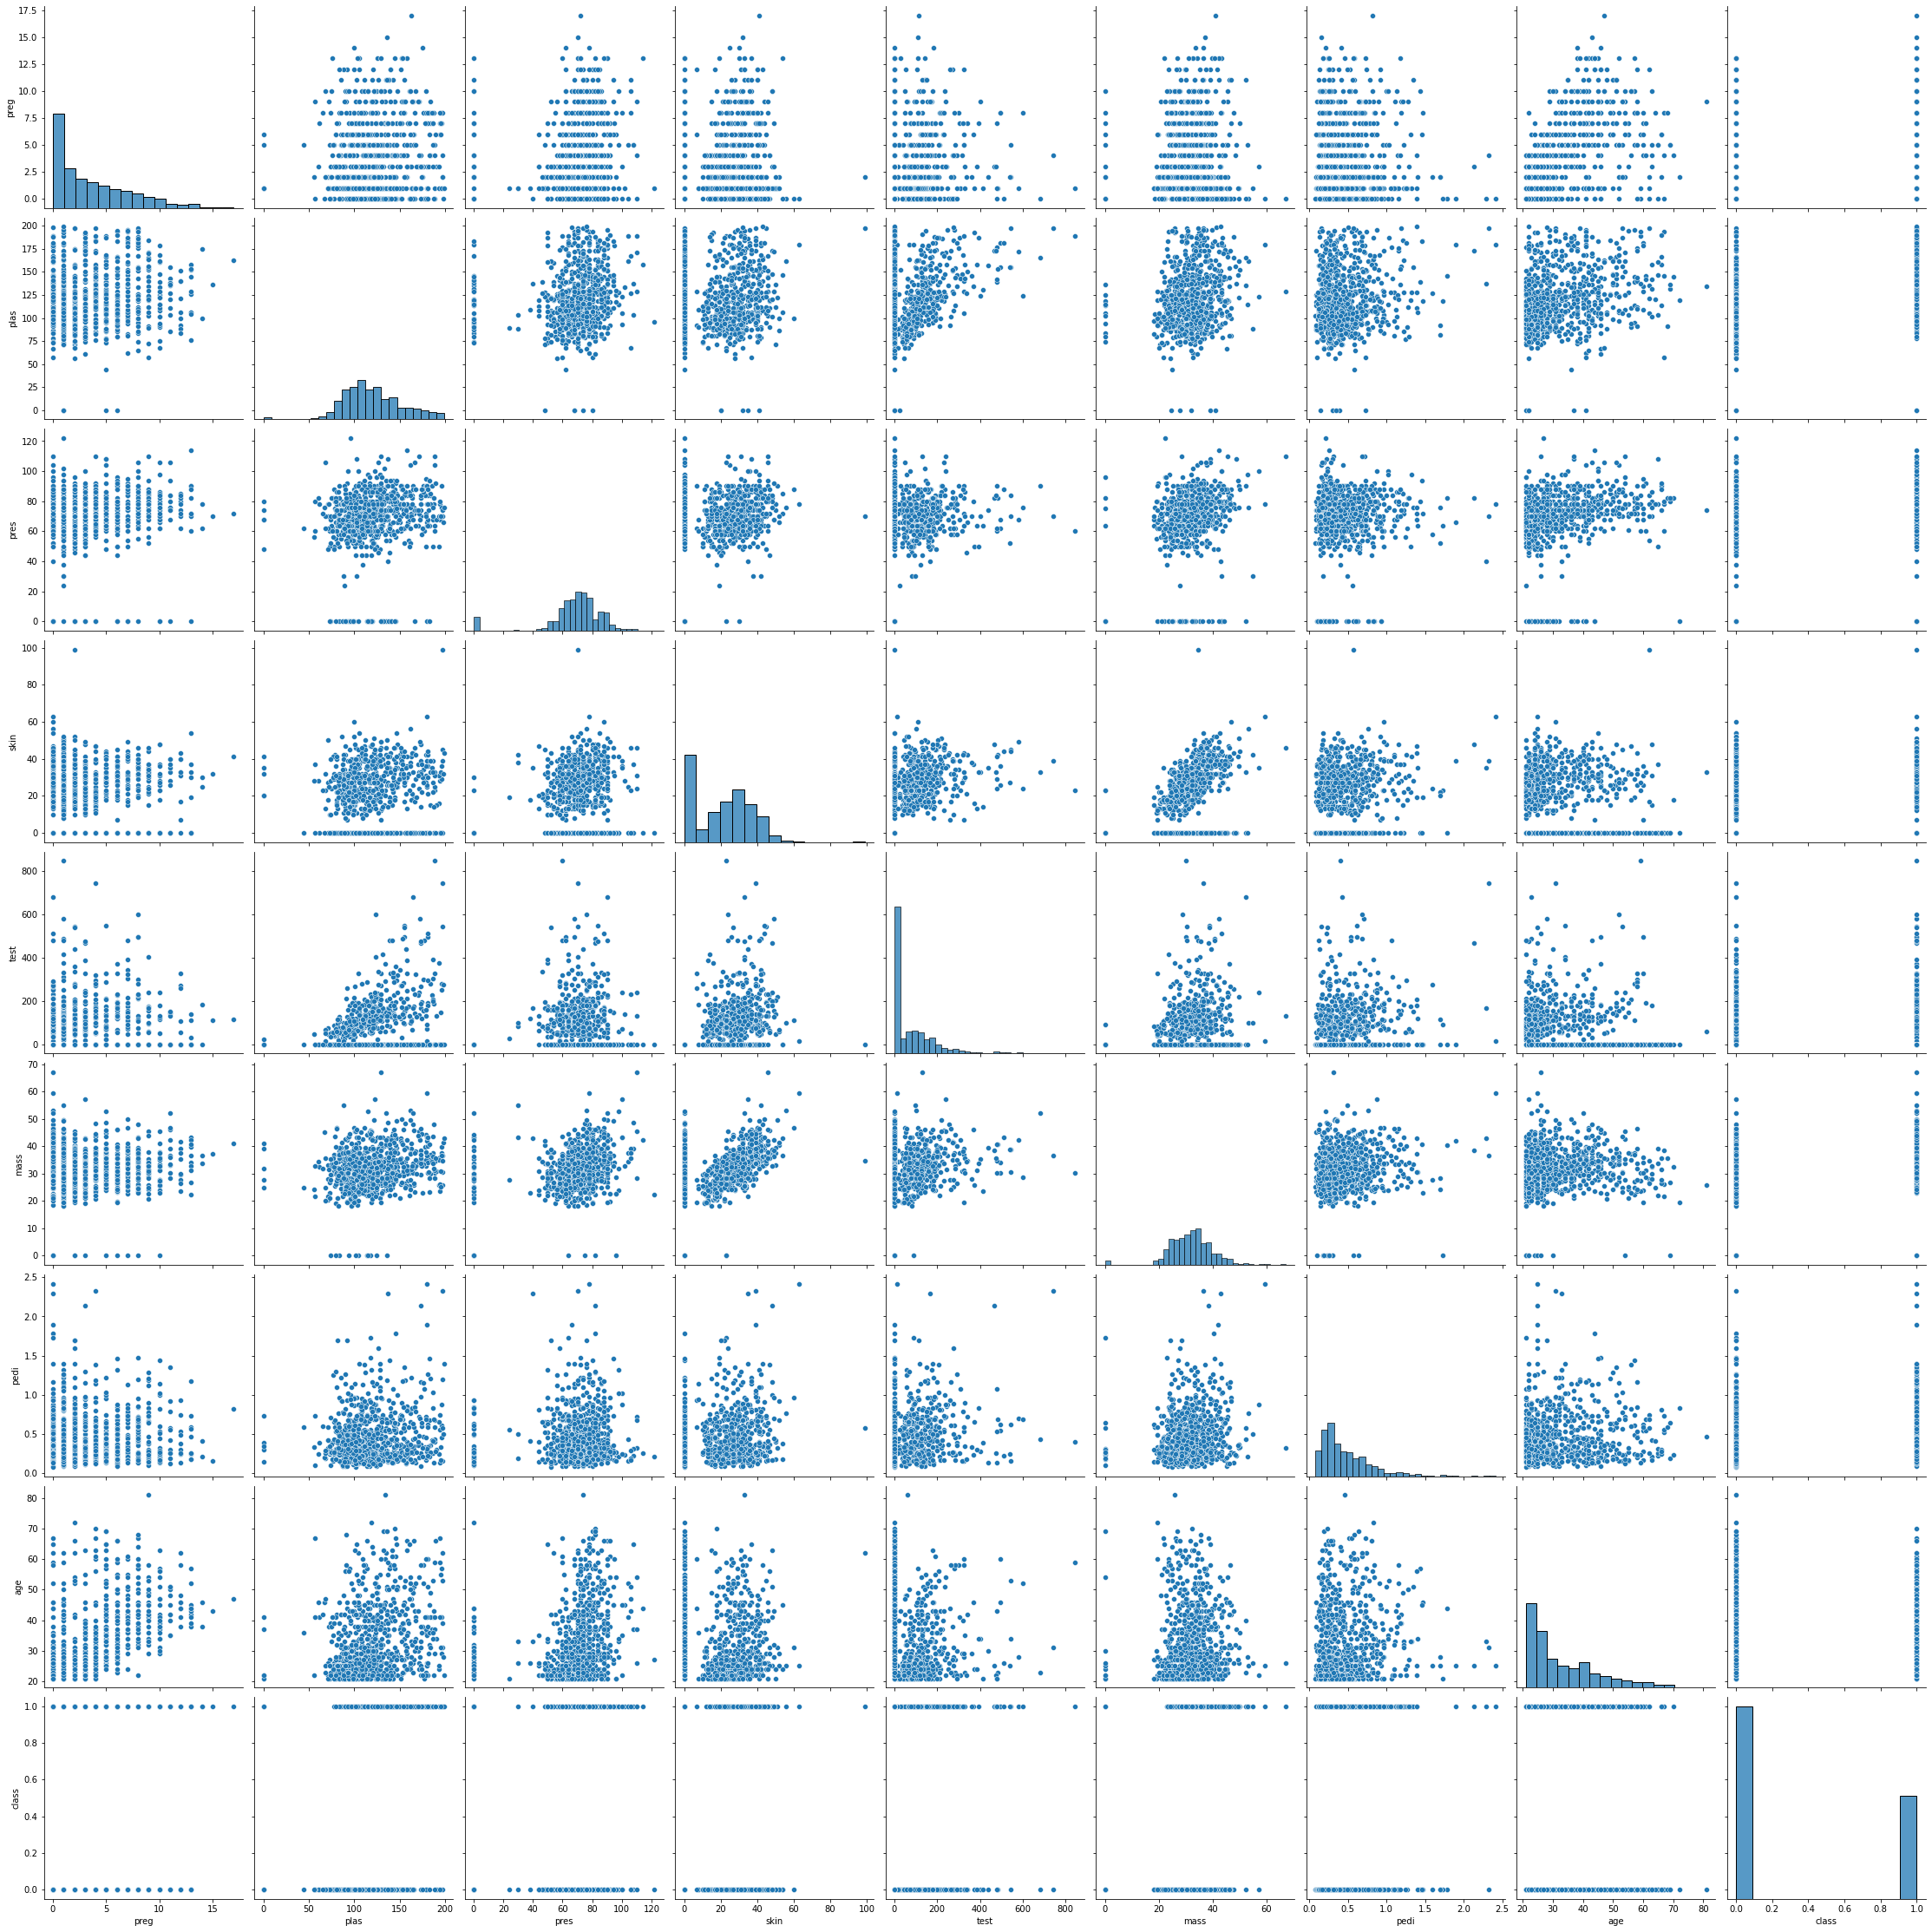

In [94]:
#Creating Pairplots for all Variables
sns.pairplot(df, height=3.5);
plt.show()

In [115]:
array = df.values
X = array[:,1:8]
Y = array[:,8]

In [116]:
from sklearn.model_selection import train_test_split
test_size = 0.33

seed = 7

X_train, X_test, train_y, test_y = train_test_split(X, Y, test_size=test_size,random_state=seed)

In [117]:
def one_hot_encode_object_array(arr):
    
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))


Y_train = one_hot_encode_object_array(train_y)
Y_test = one_hot_encode_object_array(test_y)

In [131]:
def create_model():
    from keras.models import Sequential
    from keras.layers import Dense
    model = Sequential()
    model.add(Dense(8, input_dim=7, activation='relu'))
    
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                      metrics=['accuracy'],
                      optimizer=keras.optimizers.Adam(lr=0.01))
    return model

In [132]:
model = create_model()

In [133]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 8)                 64        
_________________________________________________________________
dense_49 (Dense)             (None, 2)                 18        
Total params: 82
Trainable params: 82
Non-trainable params: 0
_________________________________________________________________


In [134]:
history = model.fit(X_train, Y_train,
                        batch_size=16,
                        epochs=200,
                        verbose=1,
                        validation_data=(X_test, Y_test))


Train on 514 samples, validate on 254 samples
Epoch 1/200
514/514 [==============================] - 1s 1ms/step - loss: 14.7785 - accuracy: 0.6109 - val_loss: 5.0301 - val_accuracy: 0.5236
Epoch 2/200
514/514 [==============================] - 0s 186us/step - loss: 5.0253 - accuracy: 0.5428 - val_loss: 3.6785 - val_accuracy: 0.6339
Epoch 3/200
514/514 [==============================] - 0s 185us/step - loss: 3.3330 - accuracy: 0.5642 - val_loss: 3.4448 - val_accuracy: 0.5827
Epoch 4/200
514/514 [==============================] - 0s 180us/step - loss: 3.4822 - accuracy: 0.5992 - val_loss: 2.3187 - val_accuracy: 0.6457
Epoch 5/200
514/514 [==============================] - 0s 183us/step - loss: 2.5227 - accuracy: 0.5953 - val_loss: 2.2416 - val_accuracy: 0.5984
Epoch 6/200
514/514 [==============================] - 0s 183us/step - loss: 2.3316 - accuracy: 0.6070 - val_loss: 1.7729 - val_accuracy: 0.6299
Epoch 7/200
514/514 [==============================] - 0s 175us/step - loss: 1.9512 -

In [136]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss ' ,score[0])
print('Training accuracy ' ,score[1])

Test loss  0.594989740003751
Training accuracy  0.7598425149917603


In [137]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [138]:
evaluator = KerasClassifier(build_fn=create_model, epochs = 200, batch_size=5)

In [139]:
kfold = KFold(n_splits = 10, shuffle = True, random_state = seed)
results = cross_val_score(evaluator, X_test, Y_test, cv=kfold)

print("Model_evaluation Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/200
228/228 [==============================] - 1s 2ms/step - loss: 12.5882 - accuracy: 0.4518
Epoch 2/200
228/228 [==============================] - 0s 416us/step - loss: 5.5424 - accuracy: 0.3860
Epoch 3/200
228/228 [==============================] - 0s 410us/step - loss: 3.5463 - accuracy: 0.5000
Epoch 4/200
228/228 [==============================] - 0s 400us/step - loss: 2.7640 - accuracy: 0.5570
Epoch 5/200
228/228 [==============================] - 0s 399us/step - loss: 3.0756 - accuracy: 0.5482
Epoch 6/200
228/228 [==============================] - 0s 397us/step - loss: 2.4261 - accuracy: 0.4868
Epoch 7/200
228/228 [==============================] - 0s 402us/step - loss: 1.3955 - accuracy: 0.5702
Epoch 8/200
228/228 [==============================] - 0s 405us/step - loss: 1.3520 - accuracy: 0.5526
Epoch 9/200
228/228 [==============================] - 0s 402us/step - loss: 1.0368 - accuracy: 0.6228
Epoch 10/200
228/228 [==============================] - 0s 400us/step - lo